In [245]:
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
weights_df = pd.read_csv("../1. Inspect, Clean and Validate Dataset/CleanedData/Cleaned_WeightsAndCalories.csv")
strava_df = pd.read_csv("../1. Inspect, Clean and Validate Dataset/CleanedData/Cleaned_Strava.csv")

In [247]:
weights_df = weights_df[["Date", "Weight, kg", "Calories In"]]
weights_df["Date"] = pd.to_datetime(weights_df["Date"], errors="coerce", format="%d/%m/%Y")
weights_df.head()

,Date,"Weight, kg",Calories In
0,2020-12-17,49.4,1500.0
1,2020-12-20,51.3,1500.0
2,2020-12-21,51.4,600.0
3,2020-12-22,51.1,1500.0
4,2020-12-26,51.7,2300.0


In [248]:
strava_df["Activity Date"] = pd.to_datetime(strava_df["Activity Date"], errors="coerce", format="%Y-%m-%d")
strava_df.head()

,Activity Date,Activity Name,Activity Type,Distance,Calories
0,2020-06-03,Evening Run,Run,5.42,NaN
1,2020-06-07,Evening Run,Run,5.30,NaN
2,2020-06-15,Evening Run,Run,5.23,NaN
3,2020-06-16,Evening Run,Run,5.29,NaN
4,2020-06-21,Evening Run,Run,6.57,NaN


In [249]:
weights_df["Daily Weight Change"] = weights_df["Weight, kg"] - weights_df["Weight, kg"].shift(1) # Daily weight change is the total difference in weight between day i and day i+1

Merge the two datasets, so we can see when exercise occurred

In [250]:
strava_df = strava_df[["Activity Date", "Calories"]]
strava_df = strava_df.dropna().reset_index(drop=True)
# Next, merge rows on activity dates
unique_strava_df = strava_df.groupby("Activity Date")["Calories"].sum()
unique_strava_df.head()

Activity Date
2021-06-19    596.0
2023-05-02    175.0
2023-05-03     59.0
2023-05-04    132.0
2023-05-05     83.0
Name: Calories, dtype: float64

Now that we have a Series containing the amount of calories burned per day, lets merge it with the nutritional data and then calculate a net calorie intake

In [251]:
weights_df = pd.merge(weights_df, unique_strava_df.to_frame(), left_on="Date", right_on="Activity Date", how="left")
weights_df = weights_df.rename(columns={"Calories": "Exercise Calories Burned"})

weights_df["Exercise Calories Burned"] = weights_df["Exercise Calories Burned"].fillna(0)
weights_df["Net Calories"] = weights_df["Calories In"] - weights_df["Exercise Calories Burned"]
weights_df

,Date,"Weight, kg",Calories In,Daily Weight Change,Exercise Calories Burned,Net Calories
0,2020-12-17,49.4,1500.0,NaN,0.0,1500.0
1,2020-12-20,51.3,1500.0,1.9,0.0,1500.0
2,2020-12-21,51.4,600.0,0.1,0.0,600.0
3,2020-12-22,51.1,1500.0,-0.3,0.0,1500.0
4,2020-12-26,51.7,2300.0,0.6,0.0,2300.0
...,...,...,...,...,...,...
1105,2025-08-17,67.6,NaN,1.2,123.0,NaN
1106,2025-08-18,66.6,NaN,-1.0,0.0,NaN
1107,2025-08-19,NaN,NaN,NaN,0.0,NaN
1108,2025-08-20,NaN,NaN,NaN,0.0,NaN


Compare daily weight change with calorific intake

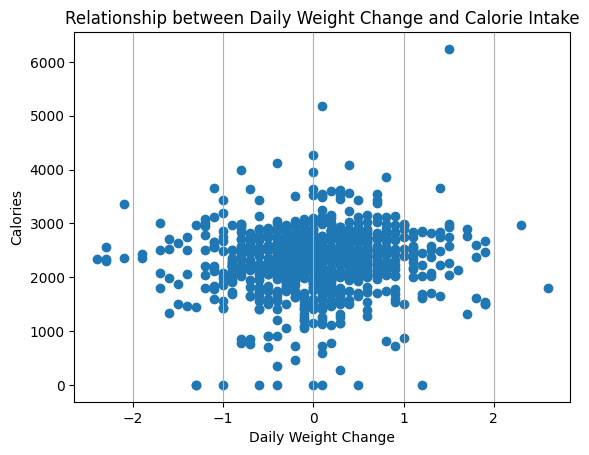

In [252]:
plt.scatter(weights_df["Daily Weight Change"], weights_df["Calories In"])
plt.xlabel("Daily Weight Change")
plt.ylabel("Calories")
plt.title("Relationship between Daily Weight Change and Calorie Intake")
plt.grid(axis='x')
plt.show()
plt.close()

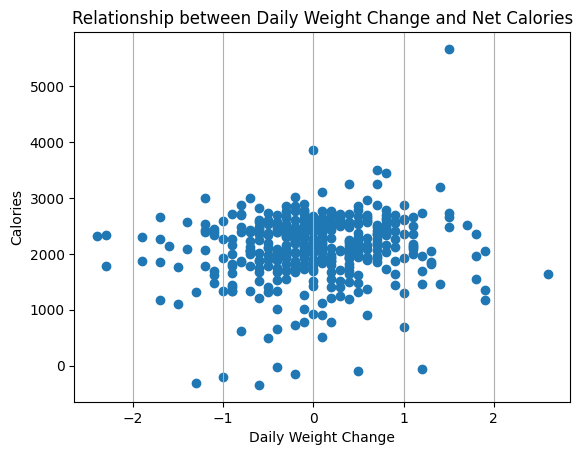

In [253]:
plt.close()
mask = weights_df["Exercise Calories Burned"] > 0
x_values = weights_df.loc[mask, "Daily Weight Change"]
y_values = weights_df.loc[mask, "Net Calories"]
plt.scatter(x_values, y_values)
plt.xlabel("Daily Weight Change")
plt.ylabel("Calories")
plt.title("Relationship between Daily Weight Change and Net Calories")
plt.grid(axis='x')
plt.show()
plt.close()

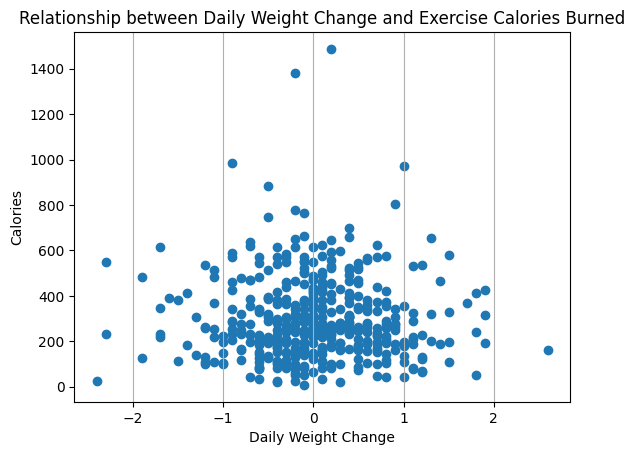

In [254]:
mask = weights_df["Exercise Calories Burned"] > 0
x_values = weights_df.loc[mask, "Daily Weight Change"]
y_values = weights_df.loc[mask, "Exercise Calories Burned"]
plt.scatter(x_values, y_values)
plt.xlabel("Daily Weight Change")
plt.ylabel("Calories")
plt.title("Relationship between Daily Weight Change and Exercise Calories Burned")
plt.grid(axis='x')
plt.show()
plt.close()